In [10]:
import pandas as pd
import numpy as np
import json  
import zipfile  
import tarfile
from IPython.display import display
import matplotlib.pyplot as plt

In [2]:
# DON NOT RUN AGAIN
tar = tarfile.open("mpd.v1.tar")

In [10]:
# DO NOT RUN AGAIN
# Extracting single file
flist = ['./src/check.py','./src/deeper_stats.py','./src/show.py','./src/descriptions.py','./src/stats.py','./src/print.py',]

for i,file in enumerate(flist):
    f = tar.extractfile(file)
    rf = f.read()
    print("Done reading "+file)
    with open('Extras/'+str(i)+'.py', 'wb') as outfile:
        outfile.write(rf)
    print("Done dumping "+file)

Done reading ./src/check.py
Done dumping ./src/check.py
Done reading ./src/deeper_stats.py
Done dumping ./src/deeper_stats.py
Done reading ./src/show.py
Done dumping ./src/show.py
Done reading ./src/descriptions.py
Done dumping ./src/descriptions.py
Done reading ./src/stats.py
Done dumping ./src/stats.py
Done reading ./src/print.py
Done dumping ./src/print.py


In [6]:
# Visualising playlist-wide stats
artists_dict = {}
word_reference_dict = {} # Genre/tag?
num_songs_dict = {}
songs_dict = {}

for start in [0,1000,2000,3000,4000]:
    data = json.load(open('Data/data'+str(start)+'.json'))
    for pcount in range(0,1000):
        
        # 1. Getting number of songs in each playlist
        songs_l = data["playlists"][pcount]['num_tracks']
        if songs_l not in num_songs_dict: num_songs_dict[songs_l] = 1
        else: num_songs_dict[songs_l] = num_songs_dict[songs_l]+1
            
        # 2,3. Getting count across tracks and artists
        tracks = data["playlists"][pcount]["tracks"]
        for track in tracks:
            track_name = track['track_name']
            if track_name not in songs_dict: songs_dict[track_name] = 1
            else: songs_dict[track_name] = songs_dict[track_name]+1
                
            artist = track['artist_name']
            if artist not in artists_dict: artists_dict[artist] = 1
            else: artists_dict[artist] = artists_dict[artist]+1
    print("Done ", str(start))

Done  0
Done  1000
Done  2000
Done  3000
Done  4000


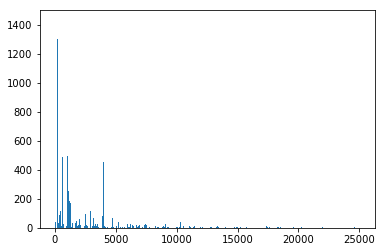

In [22]:
# Artists across lists - histogram
a = list(artists_dict.keys())
b = list(artists_dict.values())
plt.bar(np.arange(1,len(a)+1),b)
plt.ylim(0,1500)
plt.show()

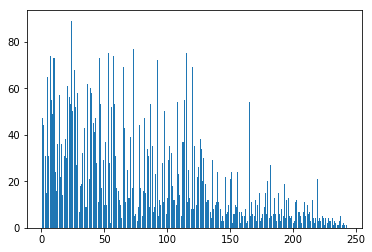

In [23]:
# Number of songs per list (size of neighbourhood to be found)
a = list(num_songs_dict.keys())
b = list(num_songs_dict.values())
plt.bar(np.arange(1,len(a)+1),b)
plt.show()

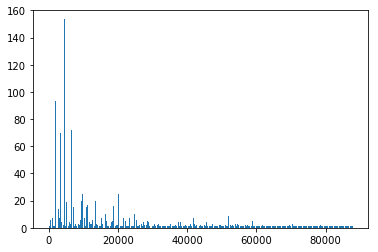

In [27]:
# Songs across lists - histogram
a = list(songs_dict.keys())
b = list(songs_dict.values())
plt.bar(np.arange(1,len(a)+1),b)
plt.ylim(0,160)
plt.show()

In [ ]:
# Word across lists
